# 기본 세팅

In [1]:
!pip install sec_edgar_api --quiet
!pip install sec_cik_mapper --quiet

In [2]:
from sec_edgar_api import EdgarClient
from datetime import datetime, timedelta
from sec_cik_mapper import StockMapper
from statsmodels.tsa.stattools import adfuller, kpss
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import io
import csv
import json

stock_mapper = StockMapper()

In [3]:
mega_cap_tickers = set([
    "AAPL", "MSFT", "AMZN","TSLA", "GOOG", "META", "BRK-B", "JNJ", "V", "WMT",
    "PG", "MA", "NVDA", "HD", "DIS", "BAC", "UNH",
    "KO", "MRK", "CSCO", "NKE", "CRM", "ABT", "CVX", "XOM",
    "ORCL", "LLY", "ACN", "ABBV", "MCD", "TMO", "COST",
    "PM", "IBM", "QCOM",
    "CAT", "USB", "RTX", "GD", "NOW",
    "ZTS", "APD", "MMM", "FIS", "ITW",
    "GE", "EMR", "PNC", "ECL", "AON", "ADM", "NSC",
    "MMC", "FDX", "CSX", "UPS", "DD", "PH",
])
print(len(mega_cap_tickers))

58


In [4]:
large_cap_tickers = set([
    "PLTR", "VZ", "HSBC", "ISRG", "MS", "AXP", "PGR",
    "INTU", "AMGN", "GS", "RY", "BX", "HDB", "PDD", "UL",
    "ADBE", "AMD", "SPGI", "TXN", "NEE", "UBER", "BKNG", "BSX",
    "DHR", "SYK", "TJX", "GILD", "TTE", "SONY", "BLK", "PFE", "SCHW", "UNP",
    "SNY", "CMCSA", "HON", "MUFG", "BUD", "LOW", "VRTX", "ADP", "FI", "DE",
    "COP", "CB", "C", "BHP", "BMY", "SPOT", "BA", "MDT", "IBN",
    "AMAT", "PANW", "LMT", "AMT", "SHOP", "TD", "ARM", "ELV", "ETN", "SO",
    "SAN", "RIO", "SBUX", "ENB", "MELI", "MO", "INTC", "WELL", "CME", "DUK",
    "ICE", "PLD", "WM", "RELX", "CI", "BTI", "KKR", "UBS", "SMFG", "ANET",
    "MCK", "ADI", "APP", "AJG", "MDLZ", "PBR", "CRWD", "HCA", "SHW"
])
mid_cap_tickers = set([
    "SWK", "MRNA", "DOX", "GMED", "JEF", "ATR", "PR", "SAIL", "SN", "ITT",
    "PAC", "VTRS", "CAVA", "KEP", "STN", "MUSA", "ORI", "BEPC", "DTM", "NICE",
    "WBA", "MGA", "HESM", "LTM", "BRBR", "GME", "HST", "PAG", "CUBE", "APG",
    "CNM", "SEIC", "PCOR", "MEDP", "OGE", "RRC", "HMY", "IPG", "PRI", "AOS",
    "SWKS", "VNOM", "CHE", "ALAB", "ARMK", "ASND", "FYBR", "SF", "DAY", "UWMC",
    "PAAS", "EPAM", "FHN", "X", "ROKU", "CACI", "INGR", "MTZ", "BWXT", "QGEN",
    "WIX", "DRS", "TECH", "DSGX", "EGP", "AM", "G", "ASR", "ESTC", "SSB",
    "SARO", "MRNO", "AGNC", "SAIA", "TLN", "AES", "CELH", "COOP", "REXR", "WF",
    "LW", "MLI", "CR", "BIRK", "CORT", "KT", "COHR", "SNX", "CRS", "AIT",
    "BLD", "ERJ", "BZ", "HSIC", "PLNT", "ADC", "SKM", "MOS", "EXAS", "MASI"
])
small_cap_tickers = set([
    "SBCF", "STRA", "MQ", "DFH", "FLOC", "LGND", "AGYS", "PGNY", "NAMS", "KWR",
    "PK", "TGI", "VNET", "RNST", "AESI", "CCS", "WRBY", "PBF", "SOC", "TRMK",
    "RXRX", "STC", "ENOV", "AMBA", "TTMI", "ARQT", "FIVN", "WSBC", "ATKR", "SYBT",
    "UEC", "AGM", "SAH", "TARS", "AIR", "ENLT", "NEXT", "NATL", "NFE", "GLP",
    "BB", "NBTB", "PLTK", "FSM", "HTH", "MTX", "NVCR", "BBUC", "DNLI", "LMAT",
    "SJW", "LGF-B", "FIHL", "ROOT", "ARDT", "TRIP", "ADUS", "GEL", "SUPN",
    "DAN", "EFSC", "MNR", "AEO", "ECG", "AMBP", "GNL", "CVI", "CLOV", "PSEC",
    "EVCM", "HE", "CNMD", "MYRG", "PINC", "HRMY", "CRTO", "MSDL", "GB", "SXI",
    "CPRI", "NEOG", "HMN", "BKE", "AGX", "CDLR", "SPB", "NWN", "CNTA", "HBI",
    "SHO", "CMBT", "TWFG", "OI", "BKV", "IHS", "KLG", "SHOO", "PRDO", "CC"
])
micro_cap_tickers = set([
    "ALLO", "AMPX", "POLE", "LOCO", "TATT", "VCIC", "JACS", "NNOX", "CZNC", "NIU",
    "MFH", "ATNI", "LE", "PDLB", "RNGR", "TRVG", "GRAF", "VSTM", "LPAA", "SOUL",
    "TDUP", "ACTG", "GSRT", "EM", "IVA", "LPBB", "LZM", "HCAT", "ATXS", "UIS",
    "MATV", "CIVB", "PANL", "AURA", "OTLY", "HLLY", "RM", "LXFR", "MXCT", "ABSI",
    "NODK", "VPG", "NVEC", "BBCP", "MTW", "GHI", "KGEI", "MVIS", "GPRE", "PBFS",
    "PBPB", "KULR", "LANV", "MPX", "DOMO", "VMD", "AIRJ", "NEN", "PKOH", "MCFT",
    "QUAD", "FERA", "FSBW", "RBB", "CLCO", "AMCX", "SHYF", "PVLA", "AACB", "NRC",
    "BRBS", "KLTR", "OABI", "SZZL", "ZIMV", "OIS", "CYRX", "APPS", "TPVG", "LAES",
    "EVTL", "AIP", "MNTK", "LUNG", "GWRS", "NYXH", "UAMY", "TTSH", "QSG", "FC",
    "BCML", "BIOX", "FNLC", "DMRC", "AUDC", "CBAN", "GOCO", "SLDB", "MTLS", "CEPO"
])

In [5]:
print(len(large_cap_tickers))
print(len(small_cap_tickers))
print(len(micro_cap_tickers))

91
99
100


In [6]:
def get_stock_price_history(ticker, start_date=None, end_date=None):
  if not start_date:
    start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
  if not end_date:
    end_date = datetime.now().strftime('%Y-%m-%d')

  try:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    price_history = {}
    for date, row in hist.iterrows():
      price_history[date.strftime('%Y-%m-%d')] = row['Close']

    return price_history
  except Exception as e:
    print(f"Error fetching stock price data: {str(e)}")
    return None

In [7]:
# 기업들 별로 오픈, 하이, 로우, 클로즈 각각의 가격에 대해 상관관계 표 생성
def concat_data(tickers, start_date, end_date):
  concat_lst=[]
  for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    # hist = hist.reset_index()
    hist.index = hist.index.strftime('%Y-%m-%d')
    hist=hist.rename(columns={
      # 'Date': f'{ticker}_Date',
      'Open': f'{ticker}_Open',
      'High': f'{ticker}_High',
      'Low': f'{ticker}_Low',
      'Close': f'{ticker}_Close',
      'Volume': f'{ticker}_Volume',
    })
    # hist[f'{ticker}_Date']=hist[f'{ticker}_Date'].dt.strftime('%Y-%m-%d')
    hist = hist.drop(columns=['Dividends', 'Stock Splits'])
    concat_lst.append(hist)
  return pd.concat(concat_lst,axis=1)

In [8]:
def compute_stats(row):
  filtered = row.drop(row.name) # 본인 제외
  return pd.Series({
    'mean': filtered.mean(),
    # 'median': filtered.median(),
    # 'median_tick':filtered.,
    'std': filtered.std(),
    'max': filtered.max(),
    'max_tick':filtered.idxmax(),
    'min': filtered.min(),
    'min_tick':filtered.idxmin(),

  })

In [9]:
def see_all(row=True,col=True):
  # 모든 행, 열 보기 설정
  import pandas as pd

  # 모든 행 출력 설정
  if row:
    pd.set_option('display.max_rows', None)
  else:
    pd.reset_option('display.max_rows') # 행 기본값: 60
  # 모든 열 출력 설정
  if col:
    pd.set_option('display.max_columns', None) # 열 기본값: 20
  else:
    pd.reset_option('display.max_columns')
  # 셀 내용 생략 없이 출력 (긴 텍스트 포함)
  # pd.set_option('display.max_colwidth', None)

In [10]:
start_date='2020-01-01'
end_date='2025-04-01'
# ticker='AAPL'
# stock = yf.Ticker(ticker)
# hist = stock.history(start=start_date, end=end_date)
# hist = hist.reset_index()
# hist=hist[['Date','Open','High','Low','Close','Volume']]
# hist['Date']=hist['Date'].dt.strftime('%Y-%m-%d')
# hist

In [11]:
mega_concated_df=concat_data(mega_cap_tickers, start_date=start_date, end_date=end_date)
mega_concated_df

,BAC_Open,BAC_High,BAC_Low,BAC_Close,BAC_Volume,UPS_Open,UPS_High,UPS_Low,UPS_Close,UPS_Volume,...,TMO_Open,TMO_High,TMO_Low,TMO_Close,TMO_Volume,PM_Open,PM_High,PM_Low,PM_Close,PM_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,31.021056,31.293094,30.968405,31.275543,37614200,97.620186,97.860754,95.587818,96.881897,4158100,...,321.837153,322.765152,318.450959,322.202423,1173300,64.650776,65.149773,64.083730,64.408836,5107200
2020-01-03,30.696365,30.845549,30.503305,30.626163,50357900,95.372136,96.939965,95.264292,96.823830,2477800,...,317.374747,321.136091,317.226638,318.697632,819600,64.287834,64.975852,64.159305,64.287834,3806700
2020-01-06,30.196165,30.626161,30.161062,30.582281,42185000,95.770286,96.417332,94.874389,96.392441,3381600,...,315.755729,321.175614,314.580923,320.988068,1010000,64.197132,65.104403,63.788858,65.036354,7041400
2020-01-07,30.450660,30.643717,30.301476,30.380455,34149000,96.110435,96.591569,95.455098,96.226570,1952300,...,321.274340,325.035685,320.830105,322.804565,917700,64.741477,65.648753,64.469294,65.323647,4311600
2020-01-08,30.336580,30.880654,30.319028,30.687597,45311600,95.712240,97.520636,95.662470,96.774055,2016000,...,322.014750,326.368439,321.067018,323.317902,939100,65.626070,66.797960,65.346325,66.563583,5337600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,43.349998,43.529999,43.040001,43.279999,25445300,115.830002,116.000000,109.889999,109.949997,10645500,...,521.479980,523.239990,510.920013,514.340027,1170700,152.000000,152.380005,150.100006,152.210007,3797100
2025-03-26,43.459999,43.720001,42.730000,42.820000,30012100,110.699997,112.349998,110.360001,111.010002,6609200,...,514.349976,518.000000,511.350006,513.669983,1216100,152.000000,154.770004,151.960007,154.330002,4320300
2025-03-27,42.820000,43.090000,42.520000,42.560001,25619200,110.820000,111.779999,110.419998,111.010002,4031700,...,513.989990,515.330017,508.059998,511.679993,1249700,154.360001,155.759995,154.009995,155.009995,4398600


In [12]:
large_concated_df=concat_data(large_cap_tickers, start_date=start_date, end_date=end_date)
mid_concated_df=concat_data(mid_cap_tickers, start_date=start_date, end_date=end_date)
small_concated_df=concat_data(small_cap_tickers, start_date=start_date, end_date=end_date)

In [13]:
print(mega_concated_df.isna().sum().sum())
print(large_concated_df.isna().sum().sum())
print(mid_concated_df.isna().sum().sum())
print(small_concated_df.isna().sum().sum())

0
7210
58785
91765


In [14]:
small_concated_df[small_concated_df.isna()]

,NEOG_Open,NEOG_High,NEOG_Low,NEOG_Close,NEOG_Volume,NVCR_Open,NVCR_High,NVCR_Low,NVCR_Close,NVCR_Volume,...,LGND_Open,LGND_High,LGND_Low,LGND_Close,LGND_Volume,GB_Open,GB_High,GB_Low,GB_Close,GB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
mega_open_cols = [col for col in mega_concated_df.columns if col.endswith('_Open')]
mega_high_cols = [col for col in mega_concated_df.columns if col.endswith('_High')]
mega_low_cols = [col for col in mega_concated_df.columns if col.endswith('_Low')]
mega_close_cols = [col for col in mega_concated_df.columns if col.endswith('_Close')]
mega_volume_cols = [col for col in mega_concated_df.columns if col.endswith('_Volume')]

large_open_cols = [col for col in large_concated_df.columns if col.endswith('_Open')]
large_high_cols = [col for col in large_concated_df.columns if col.endswith('_High')]
large_low_cols = [col for col in large_concated_df.columns if col.endswith('_Low')]
large_close_cols = [col for col in large_concated_df.columns if col.endswith('_Close')]
large_volume_cols = [col for col in large_concated_df.columns if col.endswith('_Volume')]

mid_open_cols = [col for col in mid_concated_df.columns if col.endswith('_Open')]
mid_high_cols = [col for col in mid_concated_df.columns if col.endswith('_High')]
mid_low_cols = [col for col in mid_concated_df.columns if col.endswith('_Low')]
mid_close_cols = [col for col in mid_concated_df.columns if col.endswith('_Close')]
mid_volume_cols = [col for col in mid_concated_df.columns if col.endswith('_Volume')]

small_open_cols = [col for col in small_concated_df.columns if col.endswith('_Open')]
small_high_cols = [col for col in small_concated_df.columns if col.endswith('_High')]
small_low_cols = [col for col in small_concated_df.columns if col.endswith('_Low')]
small_close_cols = [col for col in small_concated_df.columns if col.endswith('_Close')]
small_volume_cols = [col for col in small_concated_df.columns if col.endswith('_Volume')]

In [16]:
see_all(row=False,col=False)

In [17]:
# mega_concated_df_open=mega_concated_df[mega_open_cols]
# mega_concated_df_high=mega_concated_df[mega_high_cols]
# mega_concated_df_low=mega_concated_df[mega_low_cols]
mega_concated_df_close=mega_concated_df[mega_close_cols]
mega_concated_df_volume=mega_concated_df[mega_volume_cols]

large_concated_df_close=large_concated_df[large_close_cols]
large_concated_df_volume=large_concated_df[large_volume_cols]

mid_concated_df_close=mid_concated_df[mid_close_cols]
mid_concated_df_volume=mid_concated_df[mid_volume_cols]

small_concated_df_close=small_concated_df[small_close_cols]
small_concated_df_volume=small_concated_df[small_volume_cols]

In [18]:
mega_concated_df_close_log = np.log(mega_concated_df_close)
large_concated_df_close_log = np.log(large_concated_df_close)
mid_concated_df_close_log = np.log(mid_concated_df_close)
small_concated_df_close_log = np.log(small_concated_df_close)

In [19]:
mega_concated_df_close_log_chg=mega_concated_df_close_log.diff(periods=1,axis=0)
mega_concated_df_close_log_chg

,BAC_Close,UPS_Close,AMZN_Close,MRK_Close,FDX_Close,PNC_Close,V_Close,RTX_Close,NKE_Close,KO_Close,...,DIS_Close,XOM_Close,CSX_Close,UNH_Close,TSLA_Close,AON_Close,GE_Close,MCD_Close,TMO_Close,PM_Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.020982,-0.000600,-0.012213,-0.008620,-0.012457,-0.009649,-0.007985,0.001370,-0.002744,-0.005471,...,-0.011537,-0.008072,-0.004107,-0.010171,0.029203,-0.003935,0.003347,-0.003542,-0.010937,-0.001880
2020-01-06,-0.001434,-0.004465,0.014776,0.004265,0.000783,-0.002017,-0.002165,0.002150,-0.000884,-0.000365,...,-0.005819,0.007649,-0.005227,0.006918,0.019072,0.002881,0.014102,0.011183,0.007161,0.011576
2020-01-07,-0.006621,-0.001722,0.002089,-0.026987,0.009737,-0.007917,-0.002646,-0.003193,-0.000491,-0.007712,...,0.000343,-0.008218,0.006735,-0.006055,0.038067,-0.008523,-0.007441,0.001482,0.005643,0.004408
2020-01-08,0.010059,0.005673,-0.007839,-0.006749,0.014939,0.010312,0.016973,0.001500,-0.002262,0.001842,...,-0.002061,-0.015195,0.005192,0.020865,0.048033,0.004102,-0.009171,0.016057,0.001589,0.018804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,0.004864,-0.051839,0.011982,-0.049294,-0.005172,0.001924,0.002179,0.007176,-0.012693,-0.002033,...,0.014173,0.006799,-0.010778,-0.005962,0.034423,0.007577,0.008997,0.004081,-0.010752,0.004346
2025-03-26,-0.010685,0.009595,-0.022516,0.002728,0.010727,0.000226,-0.001278,-0.009852,-0.012096,0.017432,...,-0.008202,0.014307,0.012452,0.009248,-0.057424,0.001488,-0.022695,0.021467,-0.001304,0.013832
2025-03-27,-0.006090,0.000000,0.001143,-0.005805,0.001025,-0.011083,0.016368,-0.006723,0.000912,0.010230,...,-0.003280,-0.003218,0.000669,-0.004797,0.003925,0.007058,-0.007211,-0.002842,-0.003882,0.004396


In [20]:
# mega_concated_df_close_log_chg.describe()

In [21]:
large_concated_df_close_log = np.log(large_concated_df_close)
mid_concated_df_close_log = np.log(mid_concated_df_close)
small_concated_df_close_log = np.log(small_concated_df_close)

large_concated_df_close_log_chg=large_concated_df_close_log.diff(periods=1,axis=0)
mid_concated_df_close_log_chg=mid_concated_df_close_log.diff(periods=1,axis=0)
small_concated_df_close_log_chg=small_concated_df_close_log.diff(periods=1,axis=0)

<Figure size 1200x600 with 0 Axes>

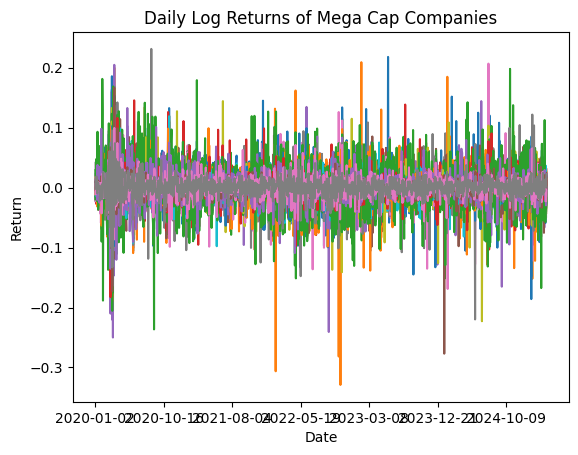

In [22]:
plt.figure(figsize=(12, 6))
mega_concated_df_close_log_chg.plot(legend=False)
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Daily Log Returns of Mega Cap Companies")
plt.show()

In [23]:
# open, high, low, close 별 차이 없음
# fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# sns.heatmap(mega_concated_df_open.corr(), ax=axs[0, 0], annot=True, cmap='coolwarm')
# axs[0, 0].set_title('Correlation Matrix 1')
# sns.heatmap(mega_concated_df_high.corr(), ax=axs[0, 1], annot=True, cmap='coolwarm')
# axs[0, 1].set_title('Correlation Matrix 2')
# sns.heatmap(mega_concated_df_low.corr(), ax=axs[1, 0], annot=True, cmap='coolwarm')
# axs[1, 0].set_title('Correlation Matrix 3')
# sns.heatmap(mega_concated_df_close.corr(), ax=axs[1, 1], annot=True, cmap='coolwarm')
# axs[1, 1].set_title('Correlation Matrix 4')

# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(16, 12))
# sns.heatmap(mega_concated_df_close.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [24]:
mega_close_corr_mat = mega_concated_df_close.corr()
mega_stats_df = mega_close_corr_mat.apply(compute_stats, axis=1)
print(mega_stats_df)

                 mean       std       max     max_tick       min   min_tick
BAC_Close    0.611842  0.189347  0.977861    PNC_Close -0.127898  FIS_Close
UPS_Close    0.206203  0.256116  0.700846    ADM_Close -0.213341  ECL_Close
AMZN_Close   0.495481  0.248335  0.895916    CRM_Close -0.316824  ADM_Close
MRK_Close    0.460765  0.379462  0.894712    XOM_Close -0.820363  FIS_Close
FDX_Close    0.551554  0.179629  0.808255     DD_Close -0.140009  FIS_Close
PNC_Close    0.594915  0.182796  0.977861    BAC_Close -0.093113  FIS_Close
V_Close      0.658945  0.324610  0.984323     MA_Close -0.431495  FIS_Close
RTX_Close    0.634967  0.311843  0.930813     KO_Close -0.535795  FIS_Close
NKE_Close   -0.121164  0.325211  0.710432    DIS_Close -0.566557  LLY_Close
KO_Close     0.628646  0.340455  0.941715   ABBV_Close -0.680042  FIS_Close
NVDA_Close   0.620998  0.357850  0.969102     GE_Close -0.544309  NKE_Close
ECL_Close    0.460197  0.268508  0.900893   META_Close -0.462074  ADM_Close
DD_Close    

In [25]:
large_close_corr_mat = large_concated_df_close.corr()
large_stats_df = large_close_corr_mat.apply(compute_stats, axis=1)

mid_close_corr_mat = mid_concated_df_close.corr()
mid_stats_df = mid_close_corr_mat.apply(compute_stats, axis=1)

small_close_corr_mat = small_concated_df_close.corr()
small_stats_df = small_close_corr_mat.apply(compute_stats, axis=1)

In [26]:
# 최근 상장된 종목들의 경우 과거 데이터가 NaN
# small_concated_df_close.loc[:, small_concated_df_close.columns.str.contains('ECG_Close')].isna().sum()

In [27]:
small_close_corr_mat

,NEOG_Close,NVCR_Close,ADUS_Close,MQ_Close,RNST_Close,STC_Close,FIVN_Close,ARDT_Close,HTH_Close,KWR_Close,...,CRTO_Close,STRA_Close,AGM_Close,AEO_Close,ROOT_Close,TGI_Close,CMBT_Close,ATKR_Close,LGND_Close,GB_Close
NEOG_Close,1.000000,0.807941,-0.308610,0.904452,0.006187,-0.218976,0.907918,0.777635,-0.152837,0.648980,...,-0.224121,-0.131505,-0.738789,0.377408,0.588710,0.164269,-0.830883,-0.539354,-0.117022,0.732802
NVCR_Close,0.807941,1.000000,-0.127985,0.822417,0.249618,-0.259406,0.875493,-0.355883,-0.012091,0.653990,...,-0.092965,-0.293007,-0.696749,0.394487,0.643458,0.149865,-0.738305,-0.482262,-0.110790,0.658512
ADUS_Close,-0.308610,-0.127985,1.000000,-0.406546,0.427667,0.405387,-0.294863,0.676396,0.283040,0.046874,...,0.398775,0.209564,0.440885,0.165360,0.239183,0.052682,0.464274,0.040187,0.639993,0.001494
MQ_Close,0.904452,0.822417,-0.406546,1.000000,0.258188,0.091914,0.918777,0.622638,0.319912,0.725528,...,0.222313,-0.501106,-0.593339,0.659406,0.595170,0.415440,-0.696826,-0.374757,-0.030179,0.670662
RNST_Close,0.006187,0.249618,0.427667,0.258188,1.000000,0.624669,0.125747,-0.506544,0.786641,0.360705,...,0.702079,-0.413323,0.370767,0.606991,0.298629,0.614562,0.138009,0.238795,0.580541,-0.042244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGI_Close,0.164269,0.149865,0.052682,0.415440,0.614562,0.597214,0.134311,-0.823209,0.513928,0.175464,...,0.489137,-0.205613,0.227836,0.453011,0.176458,1.000000,-0.118386,0.059476,0.432352,0.045524
CMBT_Close,-0.830883,-0.738305,0.464274,-0.696826,0.138009,0.434071,-0.772893,0.732809,0.404727,-0.364795,...,0.470882,0.089267,0.846422,0.001967,-0.542114,-0.118386,1.000000,0.672002,0.278034,-0.710199
ATKR_Close,-0.539354,-0.482262,0.040187,-0.374757,0.238795,0.389523,-0.391485,0.446895,0.650572,0.022289,...,0.540692,-0.278466,0.699602,0.245072,-0.691922,0.059476,0.672002,1.000000,0.072528,-0.710554
LGND_Close,-0.117022,-0.110790,0.639993,-0.030179,0.580541,0.705485,-0.145205,-0.404107,0.536659,0.160861,...,0.665331,0.036297,0.551658,0.407773,0.229783,0.432352,0.278034,0.072528,1.000000,0.047919


In [28]:
print(large_stats_df)

                mean       std       max     max_tick       min    min_tick
SCHW_Close  0.512030  0.226930  0.870527     TD_Close -0.381074  INTC_Close
PLTR_Close  0.464893  0.316000  0.967178    APP_Close -0.524467   PFE_Close
TTE_Close   0.569156  0.375324  0.933929    PBR_Close -0.686673  INTC_Close
BLK_Close   0.661939  0.249607  0.938722    SHW_Close -0.422972  INTC_Close
MELI_Close  0.552775  0.241067  0.851641   UBER_Close -0.394095   PFE_Close
...              ...       ...       ...          ...       ...         ...
PLD_Close   0.436409  0.224486  0.856247     TD_Close -0.257976  INTC_Close
AMAT_Close  0.643810  0.302438  0.922709    ADI_Close -0.439766  INTC_Close
MCK_Close   0.602692  0.398635  0.972626    AJG_Close -0.782055  INTC_Close
SNY_Close   0.519800  0.253225  0.742607   WELL_Close -0.491423  INTC_Close
MDT_Close  -0.043110  0.318301  0.781934  CMCSA_Close -0.592446   COP_Close

[91 rows x 6 columns]


In [29]:
print(mid_stats_df)

                mean       std       max    max_tick       min    min_tick
SWK_Close  -0.009484  0.493360  0.920334   SKM_Close -0.663139  MUSA_Close
ADC_Close   0.351447  0.369857  0.875840    SN_Close -0.842657  SAIL_Close
MLI_Close   0.432657  0.538554  0.980500   AIT_Close -0.863889   WBA_Close
EGP_Close   0.405148  0.371703  0.935579  CUBE_Close -0.513950  ALAB_Close
MUSA_Close  0.375660  0.573346  0.961572   AIT_Close -0.897639   WBA_Close
...              ...       ...       ...         ...       ...         ...
CACI_Close  0.369536  0.531608  0.921401  INGR_Close -0.822468   WBA_Close
BZ_Close   -0.046431  0.528473  0.874306  TECH_Close -0.818124  SAIL_Close
MEDP_Close  0.404027  0.500674  0.959547   STN_Close -0.795621   WBA_Close
WIX_Close   0.103239  0.426537  0.931592   TLN_Close -0.729641  SARO_Close
PAAS_Close  0.037154  0.425851  0.882384   TLN_Close -0.576477  SAIL_Close

[100 rows x 6 columns]


In [30]:
print(small_stats_df[:100])

                mean       std       max    max_tick       min    min_tick
NEOG_Close  0.043831  0.559079  0.941456  PLTK_Close -0.830883  CMBT_Close
NVCR_Close  0.137274  0.510415  0.880457  DNLI_Close -0.738305  CMBT_Close
ADUS_Close  0.188967  0.352614  0.893527  FLOC_Close -0.578525   IHS_Close
MQ_Close    0.119551  0.546992  0.921426  PLTK_Close -0.746679  NATL_Close
RNST_Close  0.371730  0.273724  0.909012  WSBC_Close -0.506544  ARDT_Close
...              ...       ...       ...         ...       ...         ...
TGI_Close   0.277156  0.288657  0.787700   SHO_Close -0.823209  ARDT_Close
CMBT_Close  0.034678  0.545745  0.910697  FLOC_Close -0.830883  NEOG_Close
ATKR_Close  0.078867  0.455838  0.868396  MYRG_Close -0.810643  CLOV_Close
LGND_Close  0.281656  0.325639  0.805871  NATL_Close -0.431888    HE_Close
GB_Close    0.024650  0.470748  0.879599  VNET_Close -0.750302  ARDT_Close

[99 rows x 6 columns]


In [31]:
# 상관계수 크기순으로
# aapl_corr = close_corr_mat.loc["AAPL_Close"]
# sorted_aapl_corr = aapl_corr.sort_values(ascending=False)
# sorted_aapl_corr

In [32]:
all_concat_volume_df=pd.concat([mega_concated_df_volume,large_concated_df_volume,mid_concated_df_volume,small_concated_df_volume],axis=1)
all_concat_volume_df

,BAC_Volume,UPS_Volume,AMZN_Volume,MRK_Volume,FDX_Volume,PNC_Volume,V_Volume,RTX_Volume,NKE_Volume,KO_Volume,...,CRTO_Volume,STRA_Volume,AGM_Volume,AEO_Volume,ROOT_Volume,TGI_Volume,CMBT_Volume,ATKR_Volume,LGND_Volume,GB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,37614200,4158100,80580000,8251428,3027600,1881300,8733000,4451584,5644100,11867700,...,153800,91600,33600,4722000,NaN,529600,1769200,312200,344324,1300
2020-01-03,50357900,2477800,75288000,5903698,2216500,1374400,4899700,4969756,4541800,11354500,...,254500,110600,30500,3492300,NaN,507100,3358400,292300,517288,3500
2020-01-06,42185000,3381600,81236000,7522963,2389700,1335500,10109500,4139504,4612400,14698300,...,208500,84800,24600,3775000,NaN,313600,1896000,277400,364522,96500
2020-01-07,34149000,1952300,80898000,11132275,2140100,1936300,4392300,4348775,6719900,9973900,...,139600,56100,26300,5440600,NaN,260900,1857800,249900,463908,498800
2020-01-08,45311600,2016000,70160000,15200506,3053200,1958400,5712000,3772445,4942200,10676000,...,92000,103000,60100,4621000,NaN,305100,4437400,284600,496930,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,25445300,10645500,31171200,20640200,2668900,2035900,3931200,3990600,17394100,12513900,...,322400,129400,26300,8641300,773500.0,624600,61700,705000,164800,192700
2025-03-26,30012100,6609200,32855300,13808800,2190900,1847000,6187100,4464500,18688300,14478200,...,229300,112300,26100,5638900,1222900.0,1794600,67100,432300,86300,107700
2025-03-27,25619200,4031700,27317700,12931900,1674200,2324400,7254800,3914000,16435800,11663400,...,114600,128600,29200,5056400,806800.0,1389200,92000,443100,131200,136100


In [33]:
all_concat_close_df=pd.concat([mega_concated_df_close,large_concated_df_close,mid_concated_df_close,small_concated_df_close],axis=1)
all_concat_close_df

,BAC_Close,UPS_Close,AMZN_Close,MRK_Close,FDX_Close,PNC_Close,V_Close,RTX_Close,NKE_Close,KO_Close,...,CRTO_Close,STRA_Close,AGM_Close,AEO_Close,ROOT_Close,TGI_Close,CMBT_Close,ATKR_Close,LGND_Close,GB_Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,31.275543,96.881897,94.900497,74.712280,141.316360,132.202393,184.177399,84.667381,96.001991,46.749741,...,17.209999,137.834015,69.374588,12.775584,NaN,25.076187,6.321838,39.689831,65.339989,10.326
2020-01-03,30.626163,96.823830,93.748497,74.070992,139.566956,130.932861,182.712662,84.783485,95.738960,46.494690,...,17.459999,137.437866,69.333008,12.901097,NaN,25.744753,6.449950,39.443676,63.112911,10.330
2020-01-06,30.582281,96.392441,95.143997,74.387596,139.676315,130.669083,182.317535,84.965942,95.654411,46.477699,...,17.480000,137.205322,69.399544,12.936959,NaN,25.724796,6.361258,39.246746,63.218964,10.330
2020-01-07,30.380455,96.226570,95.343002,72.406944,141.043030,129.638611,181.835678,84.695045,95.607460,46.120632,...,17.440001,137.541214,69.141594,12.802478,NaN,25.744753,6.380968,39.807980,61.746723,10.370
2020-01-08,30.687597,96.774055,94.598503,71.919899,143.165924,130.982376,184.948318,84.822197,95.391418,46.205650,...,17.459999,136.344086,69.033424,12.910062,NaN,25.764709,6.252854,40.054138,60.773548,10.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,43.279999,109.949997,205.710007,87.870003,241.070007,176.880005,344.619995,135.660004,66.540001,68.809998,...,37.650002,83.230003,193.809998,12.240000,168.554993,25.480000,9.740000,64.199997,109.690002,7.380
2025-03-26,42.820000,111.010002,201.130005,88.110001,243.669998,176.919998,344.179993,134.330002,65.739998,70.019997,...,37.070000,84.489998,192.960007,11.980000,151.110001,25.500000,9.910000,62.950001,108.089996,7.380
2025-03-27,42.560001,111.010002,201.360001,87.599998,243.919998,174.970001,349.859985,133.429993,65.800003,70.739998,...,36.639999,86.269997,194.289993,11.910000,148.940002,25.459999,9.620000,62.330002,109.699997,7.360


In [34]:
all_concat_close_df_corr_mat=all_concat_close_df.corr()
all_concat_close_df_corr_mat

,BAC_Close,UPS_Close,AMZN_Close,MRK_Close,FDX_Close,PNC_Close,V_Close,RTX_Close,NKE_Close,KO_Close,...,CRTO_Close,STRA_Close,AGM_Close,AEO_Close,ROOT_Close,TGI_Close,CMBT_Close,ATKR_Close,LGND_Close,GB_Close
BAC_Close,1.000000,0.359101,0.630482,0.254368,0.559931,0.977861,0.647362,0.739952,0.101274,0.621881,...,0.824443,-0.314131,0.610065,0.564836,-0.029307,0.744918,0.301192,0.339208,0.697870,-0.269300
UPS_Close,0.359101,1.000000,-0.002039,0.043083,0.397506,0.399019,-0.039605,0.106615,0.680987,0.216719,...,0.461966,-0.852245,0.069109,0.420060,-0.172066,0.244707,-0.032099,0.464667,-0.032634,-0.319487
AMZN_Close,0.630482,-0.002039,1.000000,0.125436,0.705017,0.594884,0.705488,0.393802,-0.045237,0.293038,...,0.551818,-0.013668,0.499501,0.521900,0.360986,0.413707,0.191668,0.012456,0.715497,0.052765
MRK_Close,0.254368,0.043083,0.125436,1.000000,0.367381,0.197463,0.626114,0.649162,-0.457296,0.761218,...,0.442429,0.091093,0.833244,-0.002916,-0.574564,-0.107814,0.915201,0.794064,0.204180,-0.728228
FDX_Close,0.559931,0.397506,0.705017,0.367381,1.000000,0.563252,0.664228,0.445259,0.134390,0.488111,...,0.721344,-0.336888,0.601933,0.653428,0.344730,0.291987,0.387588,0.396504,0.518636,-0.161103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGI_Close,0.744918,0.244707,0.413707,-0.107814,0.291987,0.731786,0.372399,0.489130,0.248560,0.339301,...,0.489137,-0.205613,0.227836,0.453011,0.176458,1.000000,-0.118386,0.059476,0.432352,0.045524
CMBT_Close,0.301192,-0.032099,0.191668,0.915201,0.387588,0.264651,0.630378,0.673207,-0.549708,0.777754,...,0.470882,0.089267,0.846422,0.001967,-0.542114,-0.118386,1.000000,0.672002,0.278034,-0.710199
ATKR_Close,0.339208,0.464667,0.012456,0.794064,0.396504,0.295782,0.426508,0.471765,-0.002601,0.609485,...,0.540692,-0.278466,0.699602,0.245072,-0.691922,0.059476,0.672002,1.000000,0.072528,-0.710554
LGND_Close,0.697870,-0.032634,0.715497,0.204180,0.518636,0.674260,0.671578,0.596271,-0.101560,0.430537,...,0.665331,0.036297,0.551658,0.407773,0.229783,0.432352,0.278034,0.072528,1.000000,0.047919


In [35]:
all_concat_stats_df = all_concat_close_df_corr_mat.apply(compute_stats, axis=1)
all_concat_stats_df

,mean,std,max,max_tick,min,min_tick
BAC_Close,0.507693,0.296246,0.977861,PNC_Close,-0.534161,SARO_Close
UPS_Close,0.155165,0.336917,0.861057,CC_Close,-0.852245,STRA_Close
AMZN_Close,0.400774,0.311698,0.944277,CR_Close,-0.744110,SARO_Close
MRK_Close,0.266592,0.508116,0.918412,TTE_Close,-0.866176,LTM_Close
FDX_Close,0.430596,0.279556,0.808255,DD_Close,-0.671307,LTM_Close
...,...,...,...,...,...,...
TGI_Close,0.317457,0.221985,0.920100,LTM_Close,-0.823209,ARDT_Close
CMBT_Close,0.290831,0.515421,0.915201,MRK_Close,-0.830883,NEOG_Close
ATKR_Close,0.252565,0.427024,0.874126,CELH_Close,-0.824298,TLN_Close
LGND_Close,0.423765,0.292234,0.936990,TLN_Close,-0.431888,HE_Close


테스트

In [36]:
see_all(row=False,col=False)

In [37]:
aapl_corr = all_concat_close_df_corr_mat.loc["AAPL_Close"]
sorted_aapl_corr = aapl_corr.sort_values(ascending=False)
sorted_aapl_corr

,AAPL_Close
AAPL_Close,1.000000
PANW_Close,0.943577
AM_Close,0.942196
MMC_Close,0.941967
PG_Close,0.941669
...,...
PLTK_Close,-0.647450
HE_Close,-0.684324
INTC_Close,-0.699520
WBA_Close,-0.737245


In [38]:
all_concat_log_df=pd.concat([mega_concated_df_close_log,large_concated_df_close_log,mid_concated_df_close_log,small_concated_df_close_log],axis=1)
all_concat_log_df.index=pd.to_datetime(all_concat_log_df.index)

In [39]:
type(all_concat_log_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [40]:
all_concat_log_chg_df=pd.concat([mega_concated_df_close_log_chg,large_concated_df_close_log_chg,mid_concated_df_close_log_chg,small_concated_df_close_log_chg],axis=1)
all_concat_log_chg_df.index=pd.to_datetime(all_concat_log_chg_df.index)

# 개별 종목에 대하여

In [41]:
aapl_log_return=all_concat_log_chg_df['AAPL_Close']
am_log_return=all_concat_log_chg_df['AM_Close']

In [42]:
type(am_log_return.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [43]:
all_concat_close_df_corr_mat.loc['AAPL_Close']

,AAPL_Close
BAC_Close,0.674939
UPS_Close,0.238507
AMZN_Close,0.595319
MRK_Close,0.695023
FDX_Close,0.694531
...,...
TGI_Close,0.289449
CMBT_Close,0.747622
ATKR_Close,0.588912
LGND_Close,0.604898


In [44]:
cor_high_dic={}
cor_low_dic={}
mega_large_tikcers=set(mega_cap_tickers).union(set(large_cap_tickers))
close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
for name in close_col_names:
  sorted_corr = all_concat_close_df_corr_mat.loc[name].sort_values(ascending=False)
  sh = (sorted_corr.index[1], sorted_corr.iloc[1])
  sl = (sorted_corr.index[-1], sorted_corr.iloc[-1])
  cor_high_dic[name] = sh
  cor_low_dic[name] = sl

all_corr_rank_mat = pd.DataFrame([cor_high_dic, cor_low_dic], index=["high", "low"])

In [45]:
see_all(row=False,col=False)

In [46]:
all_concat_close_df_corr_mat.index.value_counts()

,count
GB_Close,1
BAC_Close,1
UPS_Close,1
AMZN_Close,1
MRK_Close,1
...,...
NOW_Close,1
USB_Close,1
EMR_Close,1
MMC_Close,1


In [47]:
all_corr_rank_mat

,UPS_Close,MRK_Close,FDX_Close,KO_Close,SCHW_Close,PLTR_Close,TTE_Close,USB_Close,PG_Close,JNJ_Close,...,MUFG_Close,LLY_Close,PGR_Close,PLD_Close,DIS_Close,AMAT_Close,MCK_Close,MCD_Close,SNY_Close,MDT_Close
high,"(CC_Close, 0.861057139015389)","(TTE_Close, 0.9184117722547286)","(DD_Close, 0.808254603358151)","(SO_Close, 0.9484179430173878)","(PNC_Close, 0.8798219809186051)","(APP_Close, 0.9671776623552664)","(PR_Close, 0.9647262213949254)","(SAIL_Close, 0.9366027376670604)","(BRK-B_Close, 0.9465937993112037)","(TD_Close, 0.8323334833873153)",...,"(SMFG_Close, 0.9837314299950546)","(MUSA_Close, 0.9699806896155477)","(MLI_Close, 0.9779857903288312)","(EGP_Close, 0.920509524144704)","(SAIL_Close, 0.9232619684306711)","(MSFT_Close, 0.945894100882683)","(MUSA_Close, 0.9782973978070806)","(PAG_Close, 0.949763182985784)","(PG_Close, 0.7586469846527301)","(DIS_Close, 0.9011155374941436)"
low,"(STRA_Close, -0.8522447681902727)","(LTM_Close, -0.8661759582702679)","(LTM_Close, -0.6713073281448665)","(ECG_Close, -0.9101449980001867)","(ARDT_Close, -0.6258800323017457)","(ARDT_Close, -0.744652484289901)","(ARQT_Close, -0.8650625328649164)","(STRA_Close, -0.37358795213282625)","(ARQT_Close, -0.7622529650438097)","(ECG_Close, -0.9088717027900693)",...,"(WBA_Close, -0.835260298372034)","(WBA_Close, -0.9053051386063222)","(WBA_Close, -0.8936368375424345)","(MSDL_Close, -0.6103265983385788)","(CVI_Close, -0.6838661688699309)","(LTM_Close, -0.7025288934529668)","(IHS_Close, -0.8901312139888441)","(PLTK_Close, -0.8248340391321017)","(FLOC_Close, -0.9378153082620697)","(CVI_Close, -0.6712251545114647)"


In [48]:
all_corr_rank_mat.T.iloc[0]

,UPS_Close
high,"(CC_Close, 0.861057139015389)"
low,"(STRA_Close, -0.8522447681902727)"


In [49]:
high, low = all_corr_rank_mat.T.iloc[0]
high_ticker,high_corr=high
low_ticker,low_corr=low

print(high_ticker)
print(high_corr)
print(low_ticker)
print(low_corr)

CC_Close
0.861057139015389
STRA_Close
-0.8522447681902727


# 로그주가확인

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

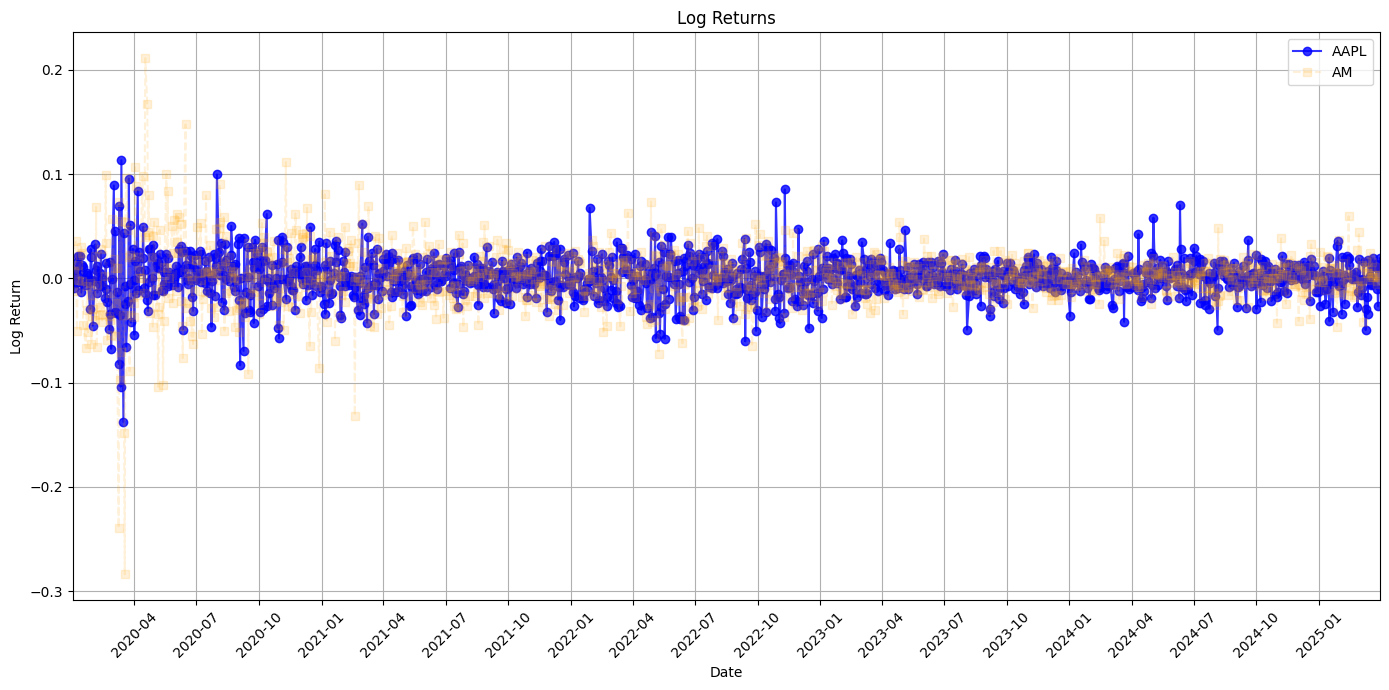

In [51]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_log_return.index, aapl_log_return, color='blue', linestyle='-', marker='o', alpha=0.8, label='AAPL')
plt.plot(am_log_return.index, am_log_return, color='orange', linestyle='--', marker='s', alpha=0.15, label='AM')

min_date = min(aapl_log_return.index.min(), am_log_return.index.min())
max_date = max(aapl_log_return.index.max(), am_log_return.index.max())
ax = plt.gca()
ax.set_xlim(min_date, max_date)  # x축 범위 설정
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
print(am_log_return.describe())
print(aapl_log_return.describe())

count    1317.000000
mean        0.001150
std         0.027906
min        -0.283887
25%        -0.011161
50%         0.001668
75%         0.012867
max         0.211142
Name: AM_Close, dtype: float64
count    1317.000000
mean        0.000848
std         0.019873
min        -0.137708
25%        -0.008540
50%         0.001156
75%         0.011918
max         0.113157
Name: AAPL_Close, dtype: float64


In [53]:
aapl_volume=all_concat_volume_df['AAPL_Volume']
am_volume=all_concat_volume_df['AM_Volume']

In [54]:
print(aapl_volume.describe())
print(am_volume.describe())

count    1.318000e+03
mean     8.886168e+07
std      5.273100e+07
min      2.323470e+07
25%      5.413160e+07
50%      7.481720e+07
75%      1.054047e+08
max      4.265100e+08
Name: AAPL_Volume, dtype: float64
count    1.318000e+03
mean     3.790316e+06
std      2.495919e+06
min      6.206000e+05
25%      2.231375e+06
50%      3.085950e+06
75%      4.500275e+06
max      2.610120e+07
Name: AM_Volume, dtype: float64


In [55]:
aapl_log_close=all_concat_log_df['AAPL_Close']
aapl_log_close.index = pd.to_datetime(aapl_log_close.index)
am_log_close=all_concat_log_df['AM_Close']
am_log_close.index = pd.to_datetime(am_log_close.index)

nvda_log_close=all_concat_log_df['NVDA_Close']
nvda_log_close.index = pd.to_datetime(nvda_log_close.index)

In [56]:
type(aapl_log_close.index)

pandas.core.indexes.datetimes.DatetimeIndex

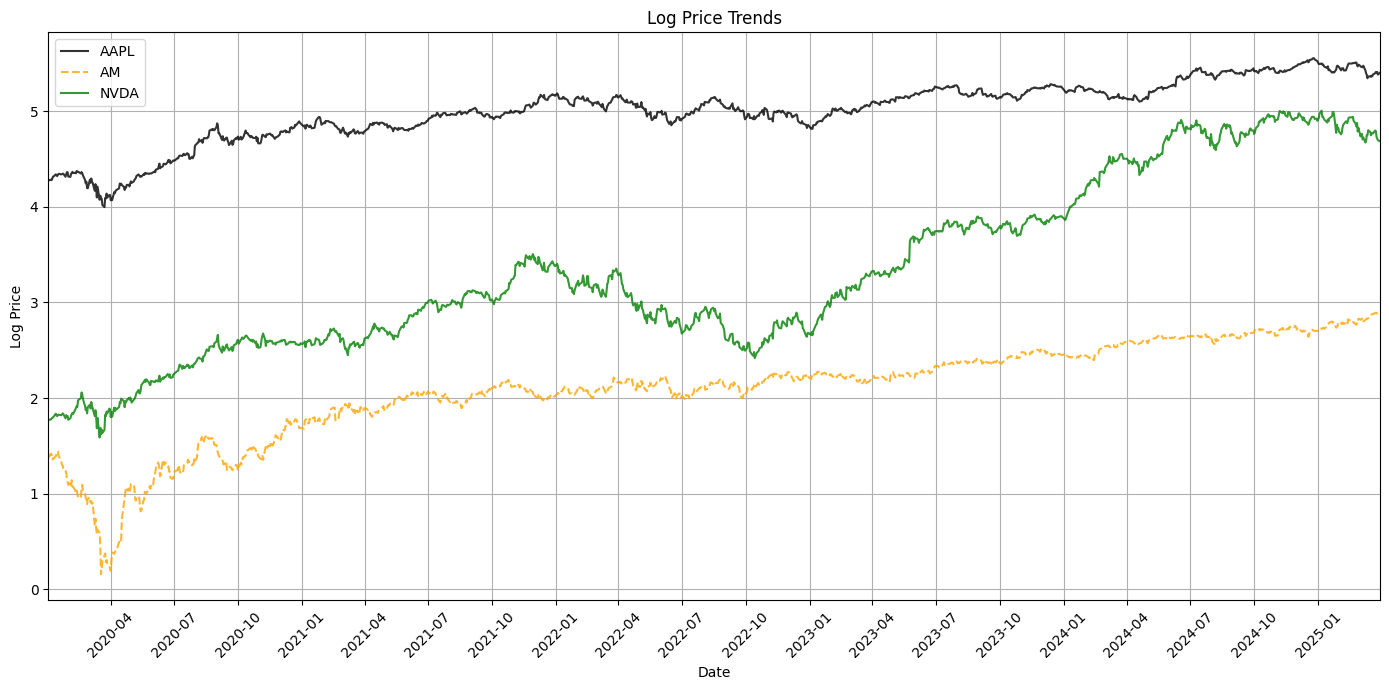

In [57]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_log_close.index, aapl_log_close, color='black', linestyle='-', alpha=0.8, label='AAPL')
plt.plot(am_log_close.index, am_log_close, color='orange', linestyle='--', alpha=0.8, label='AM')
plt.plot(nvda_log_close.index, nvda_log_close, color='green', linestyle='-', alpha=0.8, label='NVDA')

min_date = min(aapl_log_close.index.min(), am_log_close.index.min())
max_date = max(aapl_log_close.index.max(), am_log_close.index.max())
ax = plt.gca()
ax.set_xlim(min_date, max_date)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Log Price Trends')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 일반

공적분검정 : 둘이 선형 상관관계를 갖는다

정상성검정 : 로그수익률을 사용하므로 굳이..? 그래도 정상성 검정을 하면 정상(staionary) 시계열로 나온다

In [59]:
from statsmodels.tsa.stattools import coint

In [61]:
coint_t,p_value,critical_values=coint(aapl_log_return.dropna(), am_log_return.dropna())

In [62]:
print(p_value)

8.487244471473163e-21


In [ ]:
aapl_log_return[aapl_log_return.isna()]

In [ ]:
result=adfuller(aapl_log_return.dropna(), autolag='AIC')

In [ ]:
if result[1] < 0.05:
  print(f"{result[1]} is stationary")
else:
  print("non-stationary")

전략 1: 스프레드 활용, 부호 활용

In [ ]:
print(aapl_log_return.describe())
print(am_log_return.describe())

In [ ]:
aapl_am_logchg_spread_df=aapl_log_return-am_log_return
# aapl_am_logchg_spread_df.loc[aapl_am_logchg_spread_df>0]

In [ ]:
aapl_am_logchg_spread_df.describe()

In [ ]:
negative_count = (aapl_am_logchg_spread_df < 0).sum()
positive_count = (aapl_am_logchg_spread_df > 0).sum()
print(negative_count)
print(positive_count)

In [ ]:
type(aapl_am_logchg_spread_df.index)

In [ ]:
aapl_am_logchg_spread_df

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_am_logchg_spread_df.index, aapl_am_logchg_spread_df, color='blue', linestyle='-', marker='o', alpha=0.8, label='AAPL-AM spread')

ax = plt.gca()
ax.set_xlim(aapl_am_logchg_spread_df.index.min(), aapl_am_logchg_spread_df.index.max())  # x축 범위 설정
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Spread of Log Return')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(am_log_return.std())
print(aapl_log_return.std())

In [ ]:
mean=aapl_am_logchg_spread_df.describe().mean
std=aapl_am_logchg_spread_df.describe().std

# 백테스팅 테스트

In [ ]:
!pip install backtesting --quiet

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

전략 1: 스프레드(안정적인 기업(애플) 로그수익률-변동성 큰 기업(소형주, AM) 로그수익률)가 음수면 변동성 큰 기업의 수익률 모멘텀을 받았다고 가정하여 매수, 양수면 모멘텀이 죽었다고 판단하여 매도. & 이미 매수상태에서 스프레드가 여전히 음수라면 홀딩

여기는 거대기업과 소형기업 주가 비교

In [ ]:
all_concat_close_df['AM_Close']

In [ ]:
print(aapl_am_logchg_spread_df.isna().sum())
print(am_log_return.isna().sum())

In [ ]:
aapl_am_logchg_spread_df.shape

In [ ]:
len(all_concat_close_df['AM_Close'])

In [ ]:
common_index = aapl_am_logchg_spread_df.index.intersection(am_log_return.index)
am_log_return = am_log_return.loc[common_index]
aapl_am_logchg_spread_df = aapl_am_logchg_spread_df.loc[common_index]

In [ ]:
init_cash=1_000_000
cash=init_cash
am_price=all_concat_close_df['AM_Close']
commission=0.002
# iter=aapl_am_logchg_spread_df.reset_index(drop=True)
# trade_ratio=0.5
position=0 # 주식보유수량
equity_curve=[]  # 각 시점의 자산 가치 기록
cash_=[] # 각 시점 별 현금
for idx in range(len(am_price)):
  price=am_price.iloc[idx]
  spread=aapl_am_logchg_spread_df.iloc[idx]

  # 스프레드가 음수이면 전액 매수
  if (spread<0):
    buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
    if buy_qty > 0:
      cost = buy_qty*price*(1+commission)
      cash -= cost
      position += buy_qty
      print(f"{aapl_am_logchg_spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
    else:
      print(f"{aapl_am_logchg_spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
  # 스프레드가 양수이면 전량 매도
  elif (spread>0) and (position>0):
    cash += position*price*(1-commission)
    print(f"{aapl_am_logchg_spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
    position = 0
  else:
    print("포지션 변화 없음")

  cash_.append(cash)
  # 현재 시점 자산
  equity=cash+position*price
  equity_curve.append(equity)
  print(f"스프레드 : {spread}")
  print(f"누적총자산:{equity_curve[idx]}")
  print(f"주식보유수량:{position}, 주식가격{price}")
  print(f"현금보유량:{cash}")
  print()

In [ ]:
equity_curve_series=pd.Series(equity_curve)
total_ret=equity_curve_series.diff()/equity_curve_series.shift(-1)
total_ret

In [ ]:
cum_ret=(1+total_ret).cumprod()
cum_ret

In [ ]:
if cash_[-1] < init_cash:
  print("손해 ", cash_[-1])
elif cash_[-1] > init_cash:
  print("이득 ", cash_[-1])
else:
  print("그저 그럼 ", cash_[-1])

In [ ]:
# 백테스팅 docs : https://kernc.github.io/backtesting.py/doc/backtesting/#gsc.tab=0

class SpreadStrategy(Strategy):
  def init(self):
    pass

  def next(self):
    current_spread = self.data.Spread[-1]

    # 스프레드가 음수이면 소형주 주가의 모멘텀이 높다고 판단하여 매수 신호
    if current_spread < 0:
      # 이미 포지션이 있고 숏 상태라면 청산 후 롱 포지션 진입
      if self.position and self.position.is_short:
        self.position.close()
        self.buy()
      # 포지션이 없다면 바로 매수
      elif not self.position:
        self.buy()

    # 스프레드가 양수이면 매도 신호(혹은 숏 포지션 진입)
    elif current_spread > 0:
      # 이미 포지션이 있고 롱 상태라면 청산 후 숏 포지션 진입
      if self.position and self.position.is_long:
        self.position.close()
        self.sell()
      # 포지션이 없다면 바로 매도
      elif not self.position:
        self.sell()

    # 스프레드가 0이면 특별한 행동은 취하지 않습니다.
    else:
      pass

In [ ]:
dates = aapl_am_logchg_spread_df.dropna().index
data = np.random.randn(aapl_am_logchg_spread_df.dropna().shape[0])

DATA = pd.DataFrame()
DATA['Open']= DATA['High'] = DATA['Low'] = pd.Series(data, index=dates)
DATA['Close'] = am_log_return.dropna() # 거래하고자 하는 기업
DATA['Spread'] = aapl_am_logchg_spread_df.dropna() # 두 기업의 스프레드(기준기업-거래대상기업)
DATA.dropna()

DATA.index = pd.to_datetime(DATA.index)
bt = Backtest(DATA, SpreadStrategy, cash=10000, commission=0.002)
stats = bt.run()
print(stats)
bt.plot()

In [ ]:
# ohlcv = pd.read_csv('AAPL.csv', index_col=0, parse_dates=True)
# bt = Backtest(ohlcv, MyStrategy)

# 전략 1 백테스팅 : 단체 테스트

## 백테스트 함수 - 미완성

In [ ]:
def strategy():
  # 전략 : 백테스팅
  for idx in range(len(high_corr_price)):
    price=high_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매수
    if (spread<0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    # 스프레드가 양수이면 전량 매도
    elif (spread>0) and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
def group_backtest(init_cash_=1_000_000, commission_=0.002, mat=all_corr_rank_mat):
  test_result_dic={}
  # 백테스팅 세팅
  init_cash=init_cash_ # 투자 시작금
  commission=commission_ # 수수료
  for i in range(mat.shape[1]): # mat : all_corr_rank_mat
    target_ticker=mat.columns[i]
    high,low=mat.T.iloc[i]

    target_log_return=all_concat_log_chg_df[target_ticker]
    high_ticker,high_corr=high
    # low_ticker,low_corr=low
    high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
    # low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
    spread_df=target_log_return-high_log_return
    common_index = spread_df.index.intersection(high_log_return.index)
    high_log_return = high_log_return.loc[common_index]
    target_log_return = target_log_return.loc[common_index]

    cash=init_cash
    high_corr_price=all_concat_close_df[high_ticker]
    # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
    # trade_ratio=0.5
    position=0 # 주식보유수량
    equity_curve={}  # 각 시점의 자산 가치 기록
    cash_=[] # 각 시점 별 현금

    # 백테스팅
    for idx in range(len(high_corr_price)):
      price=high_corr_price.iloc[idx]
      spread=spread_df.iloc[idx]

      # 스프레드가 음수이면 전액 매수
      if (spread<0):
        buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
        if buy_qty > 0:
          cost = buy_qty*price*(1+commission)
          cash -= cost
          position += buy_qty
          print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
        else:
          print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
      # 스프레드가 양수이면 전량 매도
      elif (spread>0) and (position>0):
        cash += position*price*(1-commission)
        print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
        position = 0
      else:
        print("포지션 변화 없음")

      cash_.append(cash)
      # 현재 시점 자산
      equity=cash+position*price
      equity_curve[spread_df.index[idx]]=equity
      # print(f"스프레드 : {spread}")
      # print(f"누적총자산:{equity_curve[idx]}")
      # print(f"주식보유수량:{position}, 주식가격{price}")
      # print(f"현금보유량:{cash}")
      # print()
    test_result_dic[target_ticker]={
        'target':target_ticker,
        'high_corr':high_ticker,
        'equity':equity_curve,
    }
  return test_result_dic

## 상관계수 높은 애들의 스프레드를 이용해 음수면 매수 양수면 매도

타깃 로그수익률-상관높은 로그수익률이 스프레드인데, 이게 음수라면 상관높은 애들이 수익률이 높다는 것이고, 상대적으로 수익률이 높다는 것이 모멘텀이 있다고 봄

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  high_ticker,high_corr=high
  # low_ticker,low_corr=low
  high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  # low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-high_log_return
  common_index = spread_df.index.intersection(high_log_return.index)
  high_log_return = high_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  high_corr_price=all_concat_close_df[high_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(high_corr_price)):
    price=high_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매수 (스프레드 = 대형주의 로그수익률-소형주의 로그수익률)
    if (spread<0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    # 스프레드가 양수이면 전량 매도
    elif (spread>0) and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'high_corr':high_ticker,
      'equity':equity_curve,
  }

In [ ]:
test_result_dic['GOOGL_Close'].keys()

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  high_corr_ticker=test_result_dic[ticker]['high_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:high_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:high_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:high_corr_ticker})

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

## 상관계수 높은 애들의 스프레드를 이용해 음수면 매도 양수면 매수

타깃 로그수익률-상관높은 로그수익률이 스프레드인데, 이게 음수라면 상관높은 애들이 수익률이 너무 높아서 곧 조정 받을 조짐이 있는 것이고 그래서 팔아야 하고, 이게 양수라면 상관높은 애들이 저점에서 올라올 타이밍이라 매수하는 것

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  high_ticker,high_corr=high
  # low_ticker,low_corr=low
  high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  # low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-high_log_return
  common_index = spread_df.index.intersection(high_log_return.index)
  high_log_return = high_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  high_corr_price=all_concat_close_df[high_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(high_corr_price)):
    price=high_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매도
    if (spread<0)and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    # 스프레드가 양수이면 전량 매수
    elif (spread>0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'high_corr':high_ticker,
      'equity':equity_curve,
  }

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  high_corr_ticker=test_result_dic[ticker]['high_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:high_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:high_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['high_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:high_corr_ticker})

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

로그수익률 스프레드가 음수일 때 매수 하는 전력과 양수일 때 매수하는 전략에서 이득보는 회사가 조금 다름

# 전략 2 백테스팅 : 단체 테스트

전략 2는 상관계수 서로 음수인 애들로

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  # high_ticker,high_corr=high
  low_ticker,low_corr=low
  # high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-low_log_return
  common_index = spread_df.index.intersection(low_log_return.index)
  low_log_return = low_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  low_corr_price=all_concat_close_df[low_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(low_corr_price)):
    price=low_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매수
    if (spread<0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    # 스프레드가 양수이면 전량 매도
    elif (spread>0) and (position>0):
      cash += position*price*(1-commission)
      print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    else:
      print("포지션 변화 없음")

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'low_corr':low_ticker,
      'equity':equity_curve,
  }

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  low_corr_ticker=test_result_dic[ticker]['low_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:low_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:low_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:low_corr_ticker})

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

In [ ]:
all_concat_close_df_corr_mat['TTE_Close'].sort_values(ascending=False)

In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

## 상관계수 음수면 매도 양수면 매수

In [ ]:
test_result_dic={}
# 백테스팅 세팅
init_cash=1_000_000 # 투자 시작금
commission=0.002 # 수수료
for i in range(all_corr_rank_mat.shape[1]):
  target_ticker=all_corr_rank_mat.columns[i]
  high,low=all_corr_rank_mat.T.iloc[i]

  target_log_return=all_concat_log_chg_df[target_ticker]
  # high_ticker,high_corr=high
  low_ticker,low_corr=low
  # high_log_return=all_concat_log_chg_df[high_ticker] # 높은 상관관계를 갖는 대상 종목의 로그수익률
  low_log_return=all_concat_log_chg_df[low_ticker] # 낮은 상관관계를 갖는 대상 종목의 로그수익률
  spread_df=target_log_return-low_log_return
  common_index = spread_df.index.intersection(low_log_return.index)
  low_log_return = low_log_return.loc[common_index]
  target_log_return = target_log_return.loc[common_index]

  cash=init_cash
  low_corr_price=all_concat_close_df[low_ticker]
  # iter=aapl_am_logchg_spread_df.reset_index(drop=True)
  # trade_ratio=0.5
  position=0 # 주식보유수량
  equity_curve={}  # 각 시점의 자산 가치 기록
  cash_=[] # 각 시점 별 현금

  # 백테스팅
  for idx in range(len(low_corr_price)):
    price=low_corr_price.iloc[idx]
    spread=spread_df.iloc[idx]

    # 스프레드가 음수이면 전액 매도
    if (spread<0)and (position>0):
      cash += position*price*(1-commission)
      # print(f"{spread_df.index[idx]}: 매도 {position}주, 가격={price}, cash={round(cash,2)}")
      position = 0
    # 스프레드가 양수이면 전량 매수
    elif (spread>0):
      buy_qty=max(int(cash//(price*(1+commission))),0)  # 매수 가능한 주식 수
      if buy_qty > 0:
        cost = buy_qty*price*(1+commission)
        cash -= cost
        position += buy_qty
        # print(f"{spread_df.index[idx]}: 매수 {buy_qty}주, 가격={price}, 남은 cash={round(cash,2)}")
      else:
        # print(f"{spread_df.index[idx]} : 돈이 없어서 아무것도 사지 못했다")
    else:
      # print("포지션 변화 없음")
      pass

    cash_.append(cash)
    # 현재 시점 자산
    equity=cash+position*price
    equity_curve[spread_df.index[idx]]=equity
    # print(f"스프레드 : {spread}")
    # print(f"누적총자산:{equity_curve[idx]}")
    # print(f"주식보유수량:{position}, 주식가격{price}")
    # print(f"현금보유량:{cash}")
    # print()
  test_result_dic[target_ticker]={
      'target':target_ticker,
      'low_corr':low_ticker,
      'equity':equity_curve,
  }

In [ ]:
mega_large_close_col_names=[f"{ticker}_Close" for ticker in mega_large_tikcers]
profit=[]
loss=[]
nothing=[]
for ticker in mega_large_close_col_names:
  print()
  # print(ticker, "에 대해서 보는 중")
  if ticker not in test_result_dic.keys():
    print(ticker, "는 test_result_dic에 없음")
    continue
  final_result=list(test_result_dic[ticker]['equity'].values())[-1]
  low_corr_ticker=test_result_dic[ticker]['low_corr']
  if  final_result > init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 이득. 최종 투자 결과 : {final_result}")
    profit.append({ticker:low_corr_ticker})
  elif final_result < init_cash:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 손해. 최종 투자 결과 : {final_result}")
    loss.append({ticker:low_corr_ticker})
  else:
    print(f"{ticker}에 대하여 {test_result_dic[ticker]['low_corr']}을 거래한 결과 아무 손해도 이익도 없음. 최종 투자 결과 : {final_result}")
    nothing.append({ticker:low_corr_ticker})

In [ ]:
print("이득 본 기업들 : ", len(profit))
print("손해 건수 : ", len(loss))
print("아무것도 없는 건수 : ", len(nothing))

In [ ]:
print("이득본 기업들 : ")
for item in profit:
  for target_ticker, high_ticker in item.items():
    final_result=list(test_result_dic[target_ticker]['equity'].values())[-1]
    print(f"타깃 회사 : {target_ticker}, 트레이딩한 회사 : {high_ticker}")
    print(f"남긴 돈 : {final_result}")
    print()

# 머신러닝